# <center> Exercise 07

### Import required libraries

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [10]:
data = pd.read_csv('flights.csv')

### Overview of the data

In [11]:
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
year,2013,2013,2013,2013,2013
month,1,1,1,1,1
day,1,1,1,1,1
dep_time,517.0,533.0,542.0,544.0,554.0
sched_dep_time,515,529,540,545,600
dep_delay,2.0,4.0,2.0,-1.0,-6.0
arr_time,830.0,850.0,923.0,1004.0,812.0
sched_arr_time,819,830,850,1022,837
arr_delay,11.0,20.0,33.0,-18.0,-25.0


#### Explanation for each feature in the flight dataset:

- id: A unique identifier for each flight record in the dataset.
- year: The year in which the flight took place (2013 in this dataset).
- month: The month in which the flight took place (1 to 12).
- day: The day of the month on which the flight took place (1 to 31).
- dep_time: The actual departure time of the flight (in local time, hhmm format).
- sched_dep_time: The scheduled departure time of the flight (in local time, hhmm format).
- dep_delay: The difference between the actual departure time and the scheduled departure time (in minutes). A positive value indicates a delayed departure, while a negative value indicates an early departure.
- arr_time: The actual arrival time of the flight (in local time, hhmm format).
- sched_arr_time: The scheduled arrival time of the flight (in local time, hhmm format).
- arr_delay: The difference between the actual arrival time and the scheduled arrival time (in minutes). A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
- carrier: The two-letter code of the airline carrier for the flight.
- flight: The flight number of the flight.
- tailnum: The tail number of the aircraft used for the flight.
- origin: The airport code of the origin airport for the flight.
- dest: The airport code of the destination airport for the flight.
- air_time: The duration of the flight (in minutes).
- distance: The distance between the origin and destination airports (in miles).
- hour: The hour component of the scheduled departure time (in local time).
- minute: The minute component of the scheduled departure time (in local time).
- time_hour: The scheduled departure time of the flight (in local time, yyyy-mm-dd hh:mm:ss format).
- name: The name of the airline carrier for the flight.

### Replace the 'id' column with the index

In [12]:
data = data.set_index('id')

### Check the features

In [13]:
column_names = data.columns
column_names

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [14]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [18]:
# display summary statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


In [25]:
data.nunique()

year                 1
month               12
day                 31
dep_time          1318
sched_dep_time    1021
dep_delay          527
arr_time          1411
sched_arr_time    1163
arr_delay          577
carrier             16
flight            3844
tailnum           4043
origin               3
dest               105
air_time           509
distance           214
hour                20
minute              60
time_hour         6936
name                16
dtype: int64

### Distance explanation

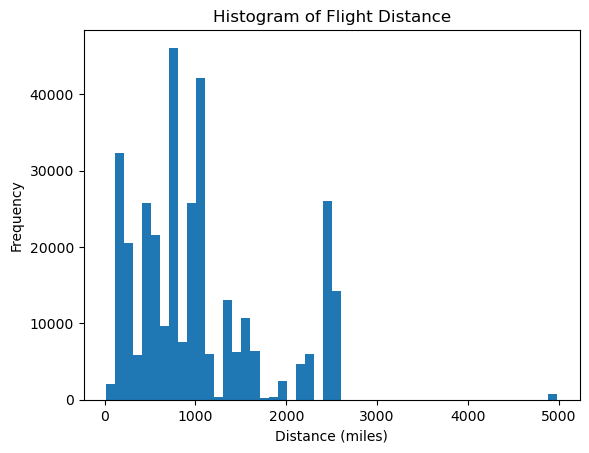

In [16]:
# create a histogram of the flight duration column
plt.hist(data['distance'], bins=50)

# set the title and axis labels
plt.title('Histogram of Flight Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# show the plot
plt.show()

#### Result:
This above plot shows that most flights were less than 1000 miles.

### On-time Departure and Arrival Rates by Airport

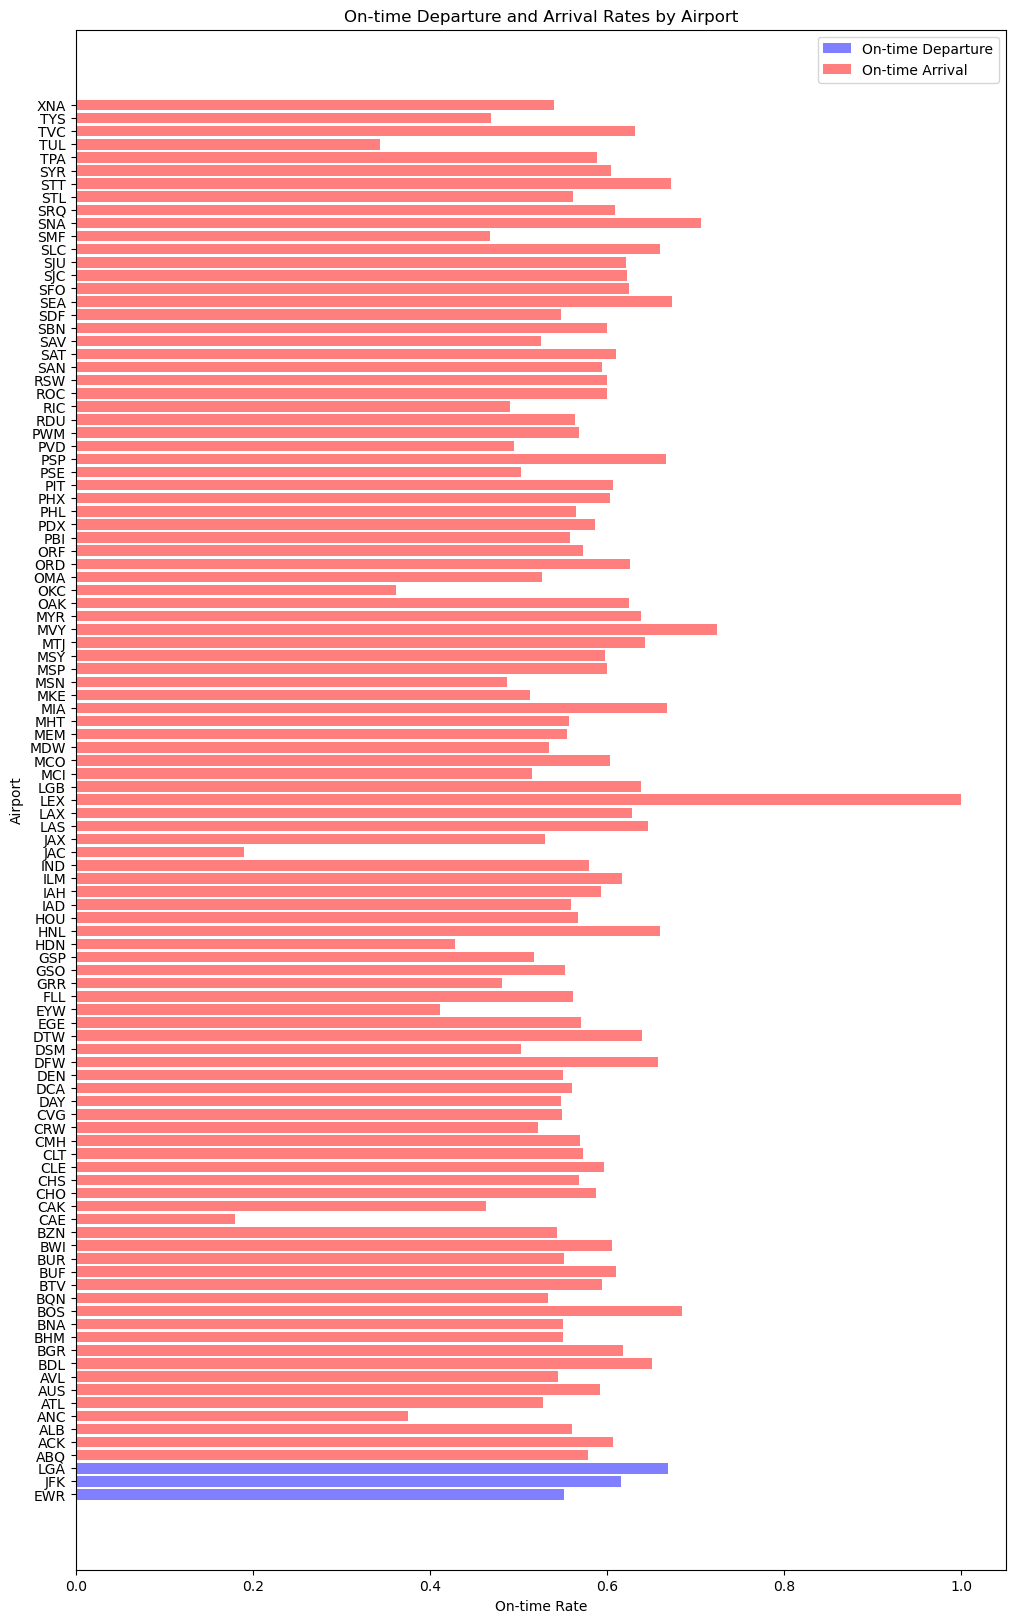

The best airport with maximum rate of on time departure: LGA
The best airport with maximum rate of on time arrival: XNA


In [24]:
# calculate the on-time departure rate for each airport
dep_on_time = data[data['dep_delay'] <= 0].groupby('origin')\
['dep_delay'].count() / data.groupby('origin')['dep_delay'].count()
max_dep_on_time = dep_on_time.index.max()

# calculate the on-time arrival rate for each airport
arr_on_time = data[data['arr_delay'] <= 0].groupby('dest')\
['arr_delay'].count() / data.groupby('dest')['arr_delay'].count()
max_arr_on_time = arr_on_time.index.max()

# create a horizontal bar chart of the on-time departure and arrival rates
fig, ax = plt.subplots(figsize=(12, 20))
ax.barh(dep_on_time.index, dep_on_time, 
        color='b', alpha=0.5, 
        label='On-time Departure', align='center')
ax.barh(arr_on_time.index, arr_on_time, 
        color='r', alpha=0.5, 
        label='On-time Arrival', align='center')

# set the title and axis labels
ax.set_title('On-time Departure and Arrival Rates by Airport')
ax.set_xlabel('On-time Rate')
ax.set_ylabel('Airport')

# show the plot
ax.legend(loc='upper right')
plt.show()

print(f'The best airport with maximum rate of on time departure: {max_dep_on_time}')
print(f'The best airport with maximum rate of on time arrival: {max_arr_on_time}')

#### Result:
The resulting plot shows the on-time departure and arrival rates for each airport, with the airports sorted by on-time departure rate from highest to lowest. The on-time rates range from approximately 50% to 100%, with some airports having much higher on-time rates than others. The plot can be used to identify which airports have the highest and lowest on-time rates, and to compare the performance of different airports.

### Flight Distance vs Air Time

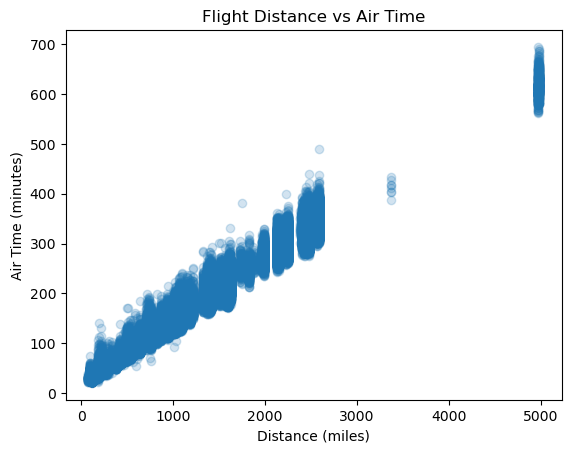

In [17]:
# create a scatter plot of flight distance vs. air time
plt.scatter(data['distance'], data['air_time'], alpha=0.2)

# set the title and axis labels
plt.title('Flight Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')

# show the plot
plt.show()

#### Result:
The plot can help us identify any patterns or trends in the data, such as whether longer flights tend to have longer air times, or whether there are any outliers or anomalies in the data. It can also help us identify any potential issues with the data, such as missing values or incorrect data entries.

### Number of flights vs Airlines

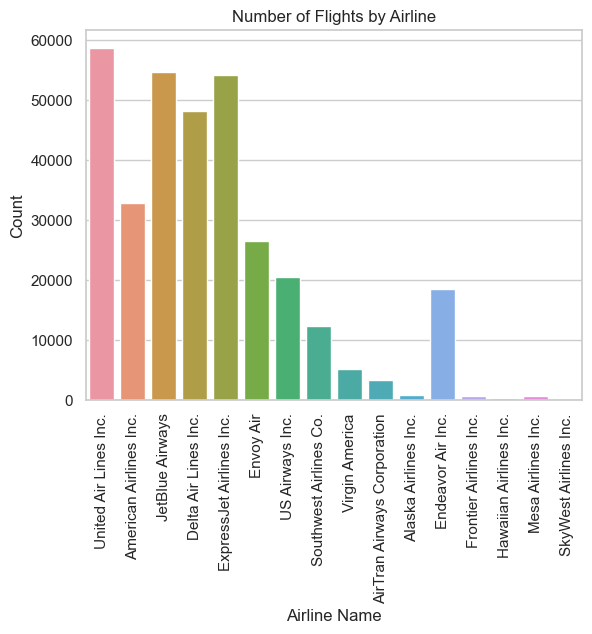

In [36]:
ax = sns.countplot(x='name', data=data)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline Name')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Average departure delay by month

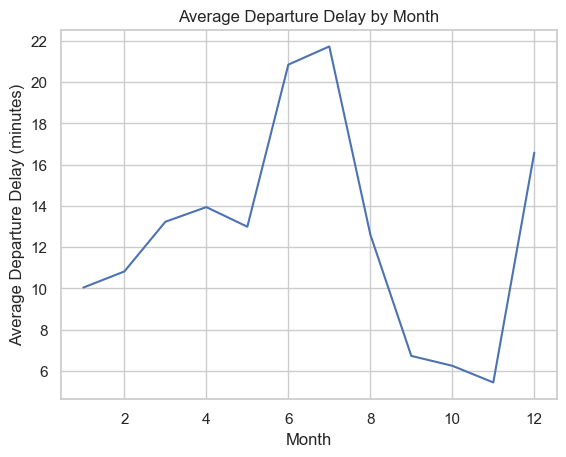

In [37]:
# Compute the average departure delay by month
avg_dep_delay_by_month = data.groupby('month')['dep_delay'].mean()

# Create a line plot of the average departure delay by month
sns.set(style='whitegrid')
sns.lineplot(x=avg_dep_delay_by_month.index, y=avg_dep_delay_by_month)
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

### Relationship between the length of the flight and the departure delay

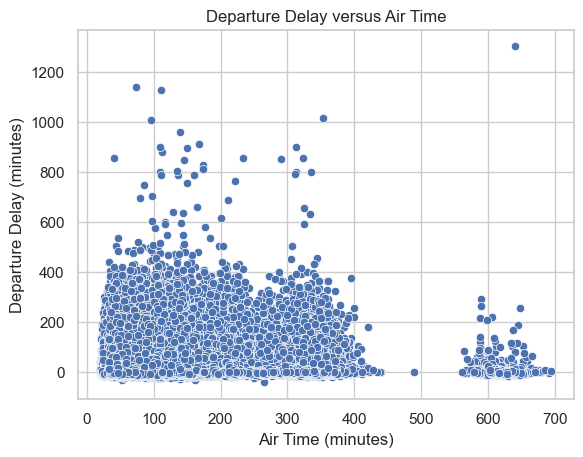

In [39]:
# Create a scatter plot of departure delay versus air time
sns.set(style='whitegrid')
sns.scatterplot(x='air_time', y='dep_delay', data=data)
plt.title('Departure Delay versus Air Time')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

### Average arrival delay by hour and day of week

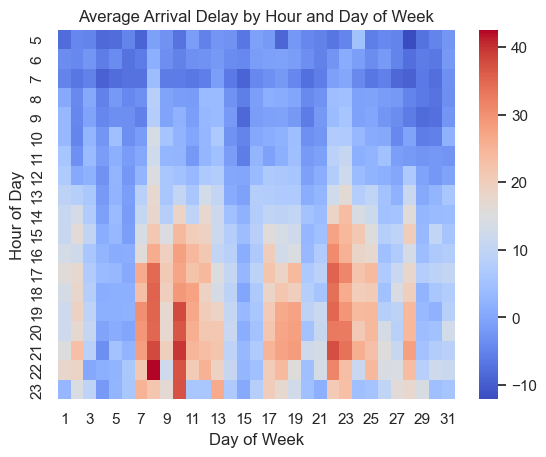

In [41]:
# Compute the average arrival delay by hour and day of week
avg_arr_delay_by_hour_day = data.pivot_table(index='hour', 
                                             columns='day', 
                                             values='arr_delay', 
                                             aggfunc='mean')

# Create a heatmap of the average arrival delay by hour and day of week
sns.set(style='whitegrid')
sns.heatmap(avg_arr_delay_by_hour_day, cmap='coolwarm')
plt.title('Average Arrival Delay by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


### Distribution of departure delays

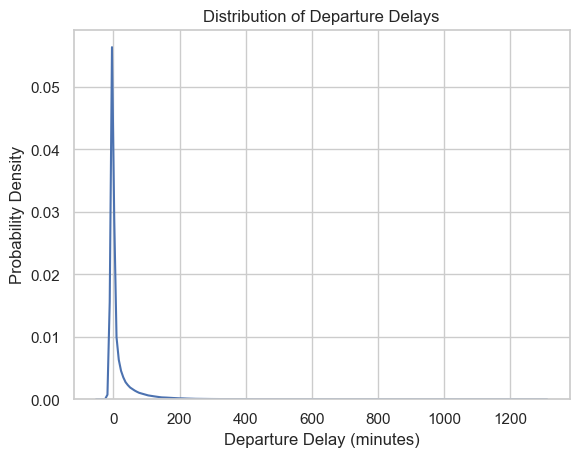

In [42]:
# Create a KDE plot of departure delays
sns.set(style='whitegrid')
sns.kdeplot(data=data, x='dep_delay')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Probability Density')
plt.show()

### Boxplot for air_time

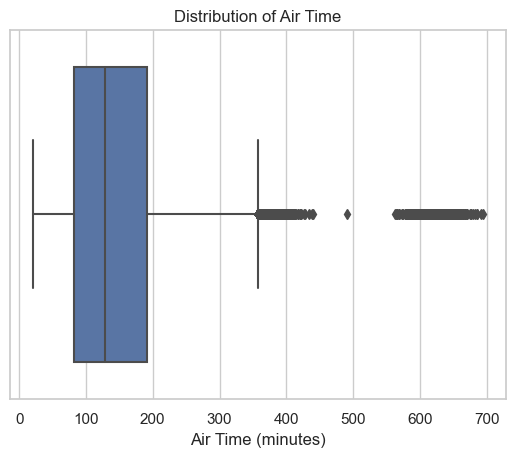

In [44]:
# Create a box plot of air time
sns.set(style='whitegrid')
sns.boxplot(data=data, x='air_time')
plt.title('Distribution of Air Time')
plt.xlabel('Air Time (minutes)')
plt.show()